# Lab 1, EV Charging Stations Data analysis

Student Name: Sandro Juric

### AI usage disclaimer
I have used the Copilot in this project, primarily for code refactoring in VS Code

# Business Understanding

Driving pure electric vehicles comes with new challenges that new and existing consumers face. Of those range anxiety is the most significant hurdle that EV driver faces in most countries. A common issue with most electric vehicles is that they typically need to be recharged after around two hundred miles of driving. While many EV drivers have home charging stations, the problem apperent during road trips. 

Therefore, having charging stations available becomes paramount to a successful road trip experience in an EV car. There are four main factors to consider when dealing with EV charging stations. Firstly, are there any charging stations available in the area where you will be driving? Secondly, do those available stations support fast DC charging and which rate can you expect the output to be? Next, do the available charging station support the type of charging connector you can have? Finally, are the stations available in good working conditions, or mostly offline?

The dataset analysed is for the global EV charging stations and will describe the state of each country EV infrastructure. Real-time data from 123 active countries, spanning 2010 to 2026, has been gathered to illustrate the growth of electric vehicles and assess the reliability of individual stations. Along with geographic data, the data includes station status, maximum power output, available connectors, and which year it was created.

My hypothesis is that the global EV infrastructure has grown significantly over the years and that will continue to grow in the decades to come. With the analysis we will explore if that is the case and what countries have reached a critical density of reliable EV station for an everyday consumer to feel comfortable driving anywhere in their EV without extensive planning.

Dataset: https://www.kaggle.com/datasets/sohails07/global-ev-charging-station-network-2010-2026


# Data Understanding

In [77]:
import pandas as pd
import numpy as np

# Suppress SettingWithCopyWarning
pd.options.mode.chained_assignment = None  # default='warn'
# Ensure future behavior for downcasting is explicit
pd.set_option('future.no_silent_downcasting', True)

df = pd.read_csv('global_ev_charging_station.csv')

# select relevant columns
dfSelect = df[['StationID', 'Country', 'Town', 'Latitude', 'Longitude', 'MaxPowerKW', 'ConnectionTypes', 'StatusType', 'YearCreated']]

# remap connection types to broader categories
connection_type_map = {
    'CHAdeMO': 'Fast',
    'CCS (Type 1)': 'Fast',
    'CCS (Type 2)': 'Fast',
    'Tesla Supercharger': 'Fast',
    'Type 2': 'Standard',
    'Type 1': 'Standard',
    'J1772': 'Standard',
    'GB/T': 'Fast',
    'Schuko': 'Slow',
    'Ceeform (Blue)': 'Slow',
    'Ceeform (Red)': 'Slow'
}




dfSelect['ConnectionTypes'] = dfSelect['ConnectionTypes'].map(connection_type_map).fillna('Other')

# remap status types to simplified categories
status_type_map = { 
    'Operational': True,
    'Under Construction': False,
    'Planned': False,
    'Temporarily Unavailable': False,
    'Removed': False
}

# convert StatusType to boolean
dfSelect['StatusType'] = dfSelect['StatusType'].map(status_type_map).astype('bool', errors='ignore')

# handle missing values for Town and Country
dfSelect['Town'] = dfSelect['Town'].fillna('Unknown')
dfSelect['Country'] = dfSelect['Country'].fillna('Unknown')

# rename columns for clarity
dfSelect.rename(columns={
    'Town': 'City', 
    'MaxPowerKW': 'Rate', 
    'YearCreated': 'Built', 
    'ConnectionTypes': 'Charge Rate', 
    'StatusType': 'Is Online', 
    'Latitude': 'Lat', 
    'Longitude': 'Long', 
    'StationID':'Station ID'}, inplace=True)

# format and display of the first few rows
# used the pandas Styler for better visualization in Jupyter Notebooks https://pandas.pydata.org/docs/user_guide/style.html
display(dfSelect.head(10).style.background_gradient(axis=None, cmap="YlGnBu"))

,Station ID,Country,City,Lat,Long,Rate,Charge Rate,Is Online,Built
0,473101,United Kingdom,Unknown,51.371709,-0.116955,250.000000,Fast,True,2026
1,472908,United Kingdom,Wythenshawe,53.366453,-2.269799,11.000000,Other,True,2026
2,472220,United Kingdom,Belfast,54.586836,-5.926869,50.000000,Fast,True,2025
3,471954,United Kingdom,Dungannon,54.509453,-6.768057,22.000000,Other,True,2025
4,471953,United Kingdom,Armagh,54.350644,-6.641787,22.000000,Other,True,2025
5,471952,United Kingdom,Armagh,54.349971,-6.642684,22.000000,Other,True,2025
6,471951,United Kingdom,Craigavon,54.435689,-6.411357,22.000000,Other,True,2025
7,471950,United Kingdom,Portadown,54.433089,-6.410223,22.000000,Other,True,2025
8,471949,United Kingdom,Lurgan,54.456608,-6.338349,22.000000,Other,True,2025
9,471948,United Kingdom,Rathfriland,54.236068,-6.162224,22.000000,Other,True,2025


### Data Cleanup
Picked the relavent features for analysis and discarded rest. Mapped over Charge Rate based on common known mapping and set unknown data to "Other". Mapped over the operational status to boolean, it's either online or not.  Renamed columns for easer read and formated the output.

In [88]:
dfSelect.info()


print("\n")
print("Data Summary Statistics:")

# Display summary statistics
display(dfSelect.describe(include='all'))

# Display number of records with unknown values with percentages
unknown_cities_count = dfSelect[dfSelect['City'] == 'Unknown'].shape[0]
print(f"Number of records with unknown cities: {unknown_cities_count} ({unknown_cities_count / len(dfSelect) * 100:.2f}%)")

unknown_countries_count = dfSelect[dfSelect['Country'] == 'Unknown'].shape[0]
print(f"Number of records with unknown countries: {unknown_countries_count} ({unknown_countries_count / len(dfSelect) * 100:.2f}%)")

other_connection_types_count = dfSelect[dfSelect['Charge Rate'] == 'Other'].shape[0]
print(f"Number of records with 'Other' connection types: {other_connection_types_count} ({other_connection_types_count / len(dfSelect) * 100:.2f}%)")

offline_stations_count = dfSelect[dfSelect['Is Online'] == False].shape[0]
print(f"Number of offline stations: {offline_stations_count} ({offline_stations_count / len(dfSelect) * 100:.2f}%)")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257585 entries, 0 to 257584
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Station ID   257585 non-null  int64  
 1   Country      257585 non-null  object 
 2   City         257585 non-null  object 
 3   Lat          257585 non-null  float64
 4   Long         257585 non-null  float64
 5   Rate         257585 non-null  float64
 6   Charge Rate  257585 non-null  object 
 7   Is Online    257585 non-null  bool   
 8   Built        257585 non-null  int64  
dtypes: bool(1), float64(3), int64(2), object(3)
memory usage: 16.0+ MB


Data Summary Statistics:


,Station ID,Country,City,Lat,Long,Rate,Charge Rate,Is Online,Built
count,257585.000000,257585,257585,257585.000000,257585.000000,257585.000000,257585,257585,257585.000000
unique,NaN,123,43777,NaN,NaN,NaN,2,2,NaN
top,NaN,United States,Unknown,NaN,NaN,NaN,Other,True,NaN
freq,NaN,86904,22756,NaN,NaN,NaN,240001,252412,NaN
mean,214027.344244,NaN,NaN,43.024583,-32.331054,36.094556,NaN,NaN,2021.177984
std,112354.931522,NaN,NaN,13.060504,57.567388,1971.171374,NaN,NaN,3.404048
min,2389.000000,NaN,NaN,-55.811599,-164.848855,0.000000,NaN,NaN,2010.000000
25%,127474.000000,NaN,NaN,38.785981,-81.528641,3.700000,NaN,NaN,2019.000000
50%,213775.000000,NaN,NaN,44.293968,-3.117260,11.000000,NaN,NaN,2023.000000
75%,289084.000000,NaN,NaN,51.343085,7.690003,22.000000,NaN,NaN,2024.000000


Number of records with unknown cities: 22756 (8.83%)
Number of records with unknown countries: 0 (0.00%)
Number of records with 'Other' connection types: 240001 (93.17%)
Number of offline stations: 5173 (2.01%)


## Data Analysis

Unknown city in data is below 10% and we still have long & lat data for those records so these can be safely ignored as mapping it can still be done to a map.

There are no unknown contries and the number of offline station is statistically insignificant to matter for the final analysis so we can ignore those.

However connection types are a big issue as the majority of the records didn't fall with the mapping range, we'll need to adjust that before proceding.

In [89]:
# get unique connection types before mapping
unique_connection_types = df['ConnectionTypes'].unique()

# print unique connection types before mapping
count(unique_connection_types)

print(unique_connection_types[:20])


['CCS (Type 2)' 'Type 2 (Socket Only)'
 'CCS (Type 2), Type 2 (Socket Only)' 'Type 2 (Tethered Connector)' nan
 'CCS (Type 2), CHAdeMO' 'CCS (Type 1)'
 'CCS (Type 2), CHAdeMO, Type 2 (Tethered Connector)' 'CHAdeMO'
 'CCS (Type 2), CHAdeMO, Type 2 (Socket Only)' 'BS1363 3 Pin 13 Amp'
 'CCS (Type 2), Type 2 (Tethered Connector)'
 'Type 2 (Socket Only), Type 2 (Tethered Connector)'
 'CCS (Type 2), CHAdeMO, Type 2 (Socket Only), Type 2 (Tethered Connector)'
 'CHAdeMO, Type 2 (Tethered Connector)'
 'BS1363 3 Pin 13 Amp, Type 2 (Socket Only)'
 'CHAdeMO, Type 2 (Socket Only), Type 2 (Tethered Connector)'
 'Type 1 (J1772), Type 2 (Socket Only)' 'CHAdeMO, Type 2 (Socket Only)'
 'Type 1 (J1772)']


# Data Visualization

# Dimensionality Reduction Method

Present the results as using charts (see [Python Code Examples/charts and tables](../HOWTOs/charts_and_tables.ipynb)).

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_theme(style="whitegrid")

for maze_name, stats in maze_stats.items():
    print(f"\033[1mStatistics for {maze_name}:")

    x = ["BFS", "DFS", "GBS", "A*"]

    plt.plot(x, stats["path cost"], label = "path cost") 
    plt.plot(x, stats["number of nodes expanded"], label = "number of nodes expanded") 
    plt.plot(x, stats["max tree depth"], label = "max tree depth") 
    plt.plot(x, stats["max nodes in memory"], label = "max nodes in memory") 
    plt.plot(x, stats["max frontier size"], label = "max frontier size")
    plt.xlabel("Agent implementation")
    plt.ylabel("Performance metrics")
    plt.legend()
    plt.show()


      

NameError: name 'maze_stats' is not defined

Discuss the most important lessons you have learned from implementing the different search strategies.

## Lesson Learned

* While the BFS, and to extend A* are guranteed to provide optimal solutions they in general take way longer and in most cases consume significantly more memory
    - this is acceptible when you are dealing with a problem that can fit in avalaible memory and time is not in a unreasonable scale
* DFS was by far the fastest implementation, but it failed to produce optimal path in most cases and it got stuck on one of the mazes
    - when space & time complexity is main concern this is preferred implementation
* A* produced optimal path, but was slower in many cases that all of them
    - just as BFS this implementation has issue with space complexity
    - additionally this implementation depends on good heuristic, if that is not provided it can perform far slower
* GBS intresting fit somewhere in between BFS & A* as far as the characteristics
    - it perform well on some mazes while taking very bad on others

## Advanced task: IDS and Multiple goals

* __Graduate students__ need to complete this task [10 points]
* __Undergraduate students__ can attempt this as a bonus task [max +5 bonus points].

### IDS
Implement IDS (iterative deepening search) using your DFS implementation. Test IDS on the mazes above. You may run into some issues with mazes with open spaces. If you cannot resolve the issues, then report and discuss what causes the problems.

Using IDS on small maze solution:


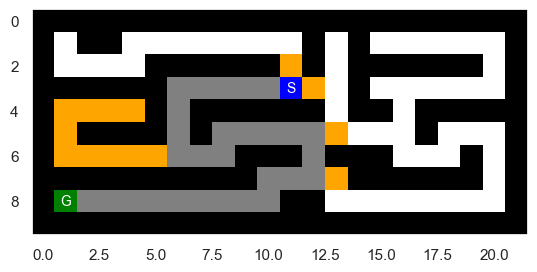

Using IDS on medium maze solution:


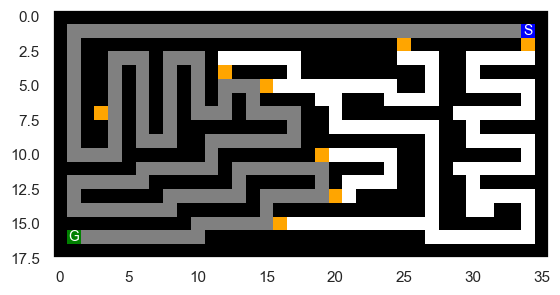

Using IDS on large maze solution:


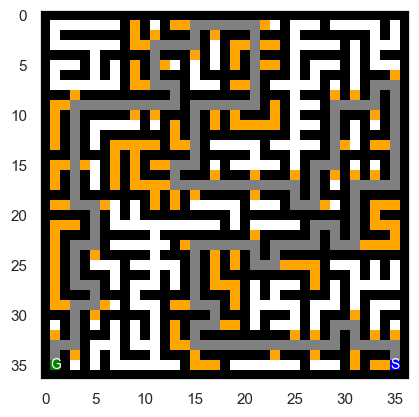

Using IDS on open maze solution:
Skipping depth-first on open maze due to cycling problem.
Using IDS on wall maze solution:


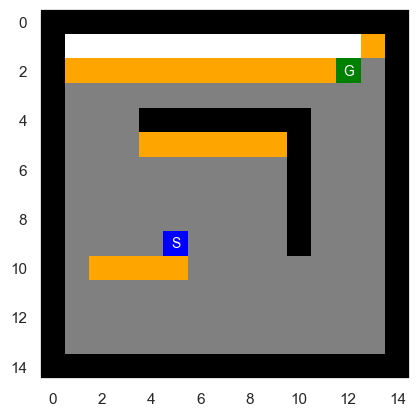

Using IDS on loops maze solution:


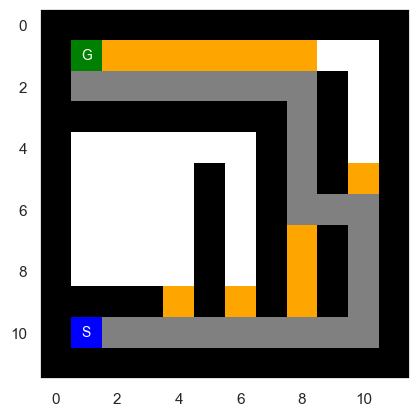

Using IDS on empty maze solution:


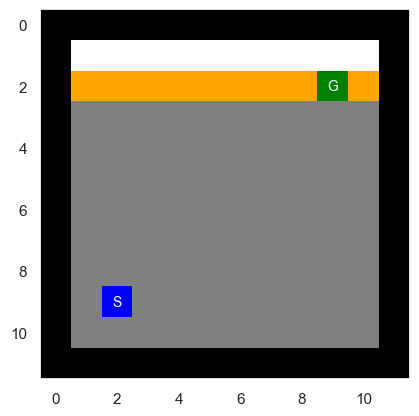

Using IDS on empty 2 maze solution:


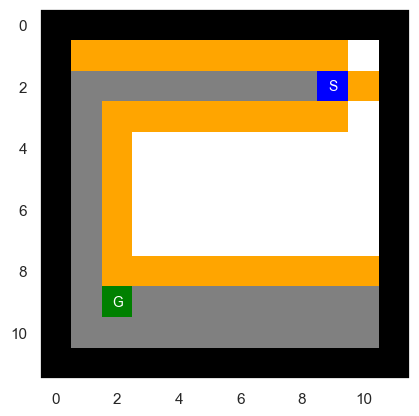

In [ ]:
sns.set_theme(style="dark")

def plan_ids(maze, start, goal, max_depth = 50000):
    stats = Stats(plan="IDS")

    for depth in range(max_depth):
        result, stats = plan_dfs(maze, start, goal, l=depth, stats=stats)
        if result != depth:
            stats.path_cost = len(result) - 1
            return (result, stats)

    return (None, stats)

plans = {"IDS" : plan_ids}


for maze_name, maze_file in maze_dict.items():
    with open(maze_file, "r") as f:
        maze_str = f.read()

    current_maze = mh.parse_maze(maze_str)

    start = mh.find_pos(current_maze, what = "S")
    goal = mh.find_pos(current_maze, what = "G")

    for plan_name, plan in plans.items():
        print(f"Using {plan_name} on {maze_name} solution:")

        if plan_name == "IDS" and maze_name == "open maze":
            print("Skipping depth-first on open maze due to cycling problem.")
            continue

        my_agent = Planning_Agent(current_maze, start, goal, plan)
        environment(my_agent.act, steps=10000, verbose=False)
        mh.show_maze(current_maze)


        current_maze = mh.parse_maze(maze_str)  # reset maze


### Multiple Goals
Create a few mazes with multiple goals by adding one or two more goals to the medium size maze. The agent is done when it finds one of the goals.
Solve the maze with your implementations for DFS, BFS, and IDS. Run experiments to show which implementations find the optimal solution and which do not. Discuss why that is the case.

Using DFS on Small Maze Multi solution:


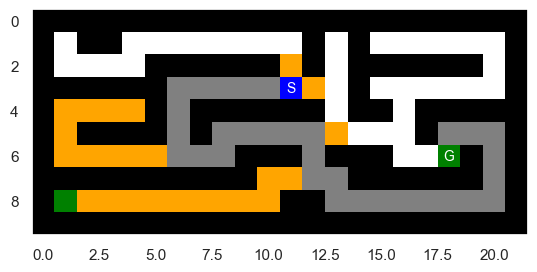

Using BFS on Small Maze Multi solution:


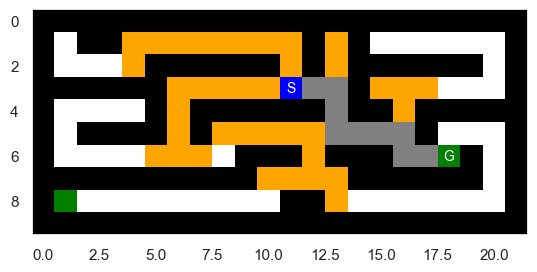

Using IDS on Small Maze Multi solution:


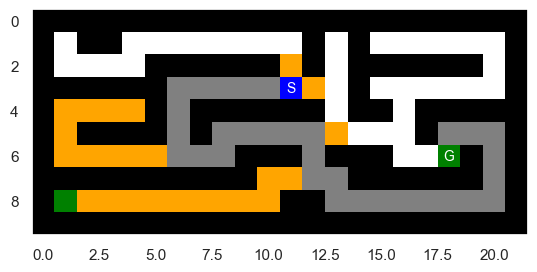

Using DFS on Empty Maze Multi solution:


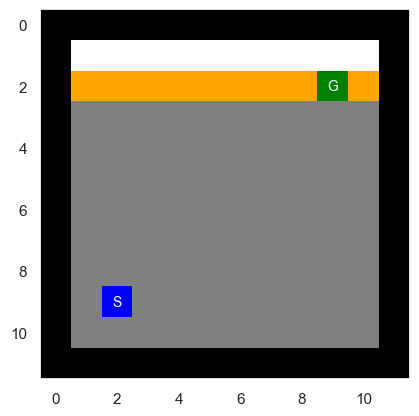

Using BFS on Empty Maze Multi solution:


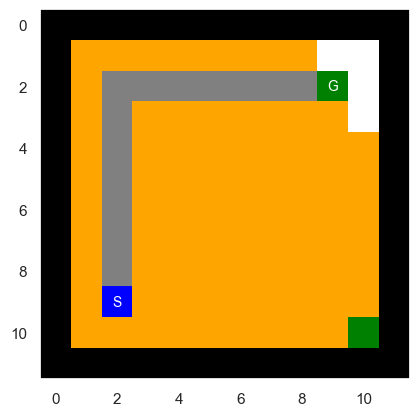

Using IDS on Empty Maze Multi solution:


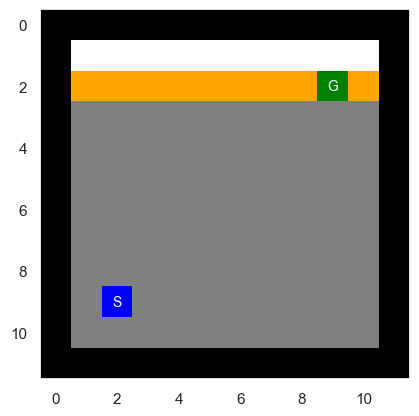

In [ ]:
plansMulti = {"DFS": plan_dfs, "BFS": plan_bfs, "IDS": plan_ids}

maze_dict_multi = {
    "Small Maze Multi": "small_maze_multi.txt",
    "Empty Maze Multi": "empty_maze_multi.txt"
}

for maze_name, maze_file in maze_dict_multi.items():
    with open(maze_file, "r") as f:
        maze_str = f.read()

    current_maze = mh.parse_maze(maze_str)

    start = mh.find_pos(current_maze, what = "S")
    goal = mh.find_pos(current_maze, what = "G")

    for plan_name, plan in plansMulti.items():
        print(f"Using {plan_name} on {maze_name} solution:")

        my_agent = Planning_Agent(current_maze, start, goal, plan)
        environment(my_agent.act, steps=10000, verbose=False)
        mh.show_maze(current_maze)


        current_maze = mh.parse_maze(maze_str)  # reset maze

## Small maze multi solution:

* DFS
    - Complete: No, parts of maze were ignored
    - Optimal: No
* BFS
    - Complete: Yes
    - Optimal: Yes

* IDS
    - Complete: No, part of the maze was ignored
    - Optimal: No

* Observations
    - BFS found the optimal path, while both DFS and IDS couldn't as they didn't search the whole maze for all possible paths

## Empty maze solution:

* DFS
    - Complete: No, parts of maze were ignored
    - Optimal: No
* BFS
    - Complete: Yes
    - Optimal: Yes

* IDS
    - Complete: No, part of the maze was ignored
    - Optimal: No

* Observations
    - BFS found the optimal path, while both DFS and IDS couldn't as they didn't search the whole maze for all possible paths
